In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
shampoo = pd.read_csv("C:/Users/atharva/OneDrive/Desktop/self learn data science/machine learning algorithms/predictive analytics/shampoo_with_exog.csv")

In [9]:
shampoo.head()

,Month,Sales
0,1-Jan,266.0
1,2-Jan,145.9
2,3-Jan,183.1
3,4-Jan,119.3
4,5-Jan,180.3


In [10]:
type(shampoo)

pandas.core.frame.DataFrame

In [11]:
#conversion of dataframe into series for time series modelling

shampoo = pd.read_csv("C:/Users/atharva/OneDrive/Desktop/self learn data science/machine learning algorithms/predictive analytics/shampoo_with_exog.csv", index_col =[0],parse_dates = True, squeeze = True)

C:\Users\atharva\AppData\Local\Temp\ipykernel_48632\1478747770.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  shampoo = pd.read_csv("C:/Users/atharva/OneDrive/Desktop/self learn data science/machine learning algorithms/predictive analytics/shampoo_with_exog.csv", index_col =[0],parse_dates = True, squeeze = True)


In [12]:
type(shampoo)

pandas.core.series.Series

<AxesSubplot:xlabel='Month'>

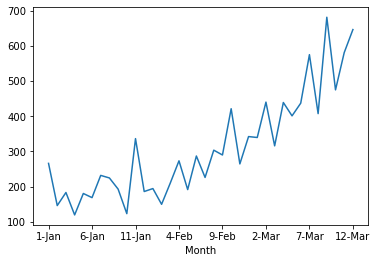

In [13]:
# plotting the time series graph
shampoo.plot()

<AxesSubplot:xlabel='Month'>

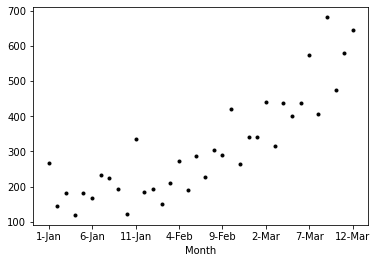

In [14]:
# changing style of the plot
shampoo.plot(style = 'k.')

In [16]:
shampoo.size

36

In [17]:
shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

# Moving averages for time series forecasting


In [20]:
shampoo_ma = shampoo.rolling(window = 10).mean()

In [38]:
shampoo_ma

Month
1-Jan        NaN
2-Jan        NaN
3-Jan        NaN
4-Jan        NaN
5-Jan        NaN
6-Jan        NaN
7-Jan        NaN
8-Jan        NaN
9-Jan        NaN
10-Jan    183.51
11-Jan    190.56
12-Jan    194.56
1-Feb     195.68
2-Feb     198.70
3-Feb     201.68
4-Feb     212.16
5-Feb     208.12
6-Feb     214.37
7-Feb     217.69
8-Feb     235.76
9-Feb     231.10
10-Feb    254.67
11-Feb    261.69
12-Feb    280.97
1-Mar     293.93
2-Mar     310.64
3-Mar     323.09
4-Mar     338.32
5-Mar     355.85
6-Mar     369.23
7-Mar     397.79
8-Mar     396.39
9-Mar     438.14
10-Mar    451.44
11-Mar    475.60
12-Mar    496.25
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Month'>

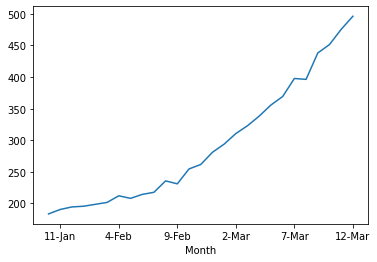

In [21]:
shampoo_ma.plot()

# Base Line Model for Time Series Forecasting

In [22]:
shampoo

Month
1-Jan     266.0
2-Jan     145.9
3-Jan     183.1
4-Jan     119.3
5-Jan     180.3
6-Jan     168.5
7-Jan     231.8
8-Jan     224.5
9-Jan     192.8
10-Jan    122.9
11-Jan    336.5
12-Jan    185.9
1-Feb     194.3
2-Feb     149.5
3-Feb     210.1
4-Feb     273.3
5-Feb     191.4
6-Feb     287.0
7-Feb     226.0
8-Feb     303.6
9-Feb     289.9
10-Feb    421.6
11-Feb    264.5
12-Feb    342.3
1-Mar     339.7
2-Mar     440.4
3-Mar     315.9
4-Mar     439.3
5-Mar     401.3
6-Mar     437.4
7-Mar     575.5
8-Mar     407.6
9-Mar     682.0
10-Mar    475.3
11-Mar    581.3
12-Mar    646.9
Name: Sales, dtype: float64

In [25]:
# creating a baseline model by shifting previous datapoint (t+1)
shampoo_baseline = pd.concat([shampoo,shampoo.shift(1)],axis=1)

In [26]:
shampoo_baseline

,Sales,Sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3
7-Jan,231.8,168.5
8-Jan,224.5,231.8
9-Jan,192.8,224.5


In [27]:
shampoo_baseline.columns = ['Actual_Sales', 'Forecasted_sales']

In [28]:
shampoo_baseline.head()

,Actual_Sales,Forecasted_sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3


In [31]:
#drop the first row for better result
shampoo_baseline.dropna(inplace = True)

In [32]:
shampoo_baseline

,Actual_Sales,Forecasted_sales
Month,,
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3
7-Jan,231.8,168.5
8-Jan,224.5,231.8
9-Jan,192.8,224.5
10-Jan,122.9,192.8


<AxesSubplot:xlabel='Month'>

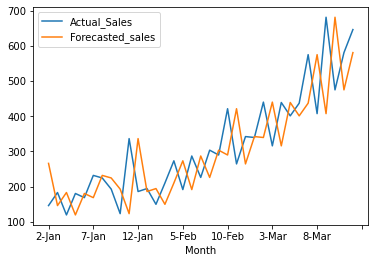

In [39]:
shampoo_baseline.plot()

In [33]:
# checking the errors and accuracy of the baseline model withthe help of MSE and RMSE

from sklearn.metrics import mean_squared_error
import numpy as np

In [35]:
shampoo_error = mean_squared_error(shampoo_baseline.Actual_Sales,shampoo_baseline.Forecasted_sales)

In [36]:
#Mean Squared error
shampoo_error

11715.388285714285

In [37]:
# root mean squared error

np.sqrt(shampoo_error)

108.23764726616282

# ARIMA = (P,D,Q) (Autorgressive, Integrated, Moving Average) 

### For auto regressive model we calculate PACF | For Moving Average model we calculate ACF 

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

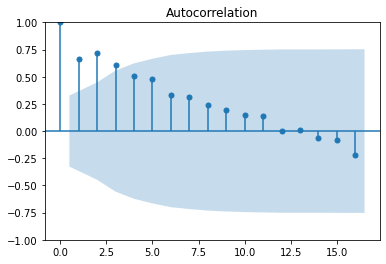

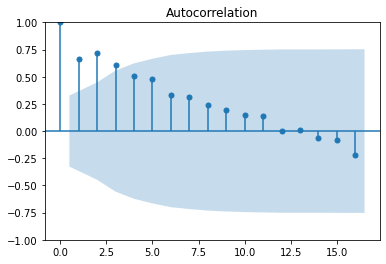

In [41]:
plot_acf(shampoo)

### from the acf plot we could figure out that Q = 3 

C:\Users\atharva\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


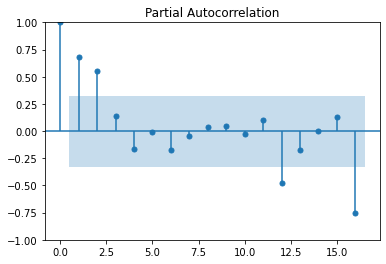

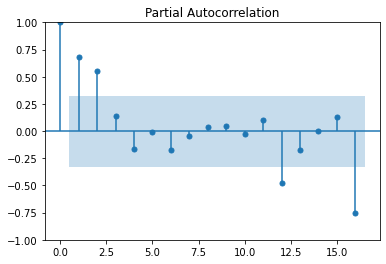

In [42]:
plot_pacf(shampoo)

### from the pacf plot we could figure out that P = 2

## To remove the trend and seasonality factor from the time series we make use of "D" we assume D between 0-2 to make the the time series dataset stationary

# ARIMA Model

In [48]:
from statsmodels.tsa.arima.model import ARIMA

In [49]:
shampoo_train = shampoo[0:25]
shampoo_test = shampoo [25:36]

In [52]:
#Create the ARIMA Model
shampoo_model = ARIMA(shampoo_train, order = (2,1,3))

C:\Users\atharva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\atharva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\atharva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [53]:
# Fitting the ARIMA Model
shampoo_model_fit = shampoo_model.fit()

In [54]:
shampoo_model_fit.aic

278.46527472013554

In [56]:
shampoo_forecast = shampoo_model_fit.forecast(steps = 11)

C:\Users\atharva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [57]:
shampoo_forecast

25    365.788195
26    352.488609
27    382.869105
28    375.541746
29    398.017282
30    394.510642
31    411.315011
32    410.195914
33    422.899002
34    423.220342
35    432.931010
Name: predicted_mean, dtype: float64

<AxesSubplot:>

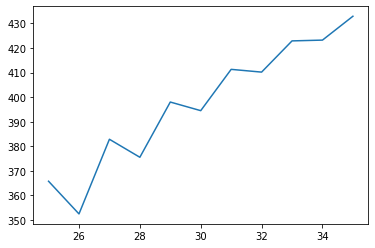

In [58]:
shampoo_forecast.plot()

In [59]:
np.sqrt(mean_squared_error(shampoo_test,shampoo_forecast))

132.27751882826178

# If ARIMA is better than baseline then accept the ARIMA Model

# If ARIMA IS not better than baseline then we perform ARIMA Grid Search  to obtain the best fit arima model

In [72]:
import warnings 
warnings.filterwarnings('ignore')

In [73]:
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)

In [74]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train,test = shampoo[0:25], shampoo[25:36]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train, order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test,predictions)
                    print('ARIMA%s MSE = %.2F'% (order,error))
                except:
                    continue

# use either of the two codes to find the Best fit ARIMA Model

In [75]:
# Define the values for p, d, and q you want to search
p_values = [0, 1, 2]
d_values = [0, 1, 2]
q_values = [0, 1, 2]



In [76]:
# Initialize an empty list to store results
results = []

In [77]:


for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            train, test = shampoo[0:25], shampoo[25:36]
            predictions = []
            try:
                for i in range(len(test)):
                    model = ARIMA(train, order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                error = mean_squared_error(test, predictions)
                results.append((order, error))
                print('ARIMA%s MSE = %.2f' % (order, error))
            except:
                continue

# Check if any results were obtained before finding the best order
if results:
    best_order, best_mse = min(results, key=lambda x: x[1])
    print('Best ARIMA order:', best_order)
    print('Best MSE:', best_mse)
else:
    print('No valid ARIMA models were fitted.')


No valid ARIMA models were fitted.
